In [10]:
import os
import sys
import re
import string
import datetime
import time
import numpy as np
import matplotlib as mptl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import *
from datetime import timedelta
from datetime import datetime
from matplotlib.pyplot import grid, figure, plot, savefig
from time import gmtime, strftime
import pandas as pd
import math
from pykalman import KalmanFilter
#END OF HEADER

In [11]:
# net probelov v imenah SVS
timeArr=[]
arrF=[]
arrS=[]
arrSvs=[]
test=[]
count_time_svs = 0
filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0502a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0503a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2


#print(filename1)
file1 = open (filename)
allLines = file1.readlines()
file1linecount = len(allLines)
file1.seek(0) # peremestit ukozatel v nachal

for ln in range(file1linecount) :#3700 strok все строки
    # read equivalent lines from 2 or 3 files, at index ln (line number); 0 base
    line  = file1.readline()
    #print(line)
    #line  = file1.readline()
   
    #re.findall(r'G..|R..', param)END OF HEADER
    #\s\d\d\s\s\d\s\s\d\s...........
  
    if ln==16:
        times = (line[4:24])
        #print(times)# 20     5     1     0
        times=times.replace("    ", " ")
        times=times.replace("   ", " ")
        times=times.replace("  ", " ")
        times = times.replace(" ", " ")
        times=times.strip()
        times= times.split(" ")
        #print(times)
        timeArr = times
    if ln >= 19 :
        param=line.strip() #str
        
       # print(ln , line)
#        print('-------------------------')

        #print(paramtimeSvs = np.array(timeSvs,dtype=object))
    #    r = re.split(r'G', line)
        #print(ln , param)                        #G28G17G12G24G 6G 2
        result = re.findall(r'G..|R..', param)# ищим G любые симв и R люб символы        # type list
        vremya = re.findall(r'\d\d\s\s\d\s\s\d\s.', param)# ищим G любые симв и R люб символы        # type list
    
        if vremya :
            #print(ln , vremya)
            count_time_svs += 1
            
       

        if result :  #
            #result = re.sub('\s', '', result)# est probeli 
            #print(ln , result)
            arrSvs.append(result)
            #[['G16', 'G23', 'G06', 'G09', 'G04', 'G22', 'G03', 'G26', 'G14', 'G31'], 
            #['G16', 'G02]]
           
        else:
            #109723767.5854 8  85499045.2474 7    109723767.58548  85499045.24747      type STR
            res = re.sub('\s\w\s', '7 ', param)#zamena otshipaih jstatkov na 7
            res=res.replace(' ',"-")
            #print(ln , ' ',res)
            res=res.replace('------------------','-NaN-')
            res=res.replace('----------','-')
            res=res.replace('----','-')
            res=res.replace('--','-')
            res=res.replace('--','-')
            #print(res)
            res= res.split("-")  #          Type list
            #param = list(map(float, param))
            #print(ln)
            
            #arrSvs.append(result)
            test.append(res)    # Скидывает все данные где нет имен спутников
#len(test)          
#len(arrSvs) 
print(count_time_svs)

2880


In [12]:
#print(len(arrSvs))
#print(len(test))
voln=[]
voln2=[]
SVS=[]
#Во всех данных test нечетные строки 5 парам и четные 2 парам
for x in range(len(test)):# chetni stroki popadat 5 parametrov(L1,L2,C,P2) eshe 2 poslednie 2 parametra s1 s2 signal shum
    if x%2==0:
        #print(x,' ',test[x])
        #if len(test[x])<4:
        #    flash2.append(x)
        if len(test[x])==4:
            #flash4.append(x)
            test[x].append('NaN')
        if len(test[x])==3:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN')
        if len(test[x])==2:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN') 
            test[x].append('NaN')
        if len(test[x])==1:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN') 
            test[x].append('NaN')   
            test[x].append('NaN') 
       # print(x)
       # print('chet ',len(test[x]))
      #  print('chet ',test[x])
        voln.append(test[x])
#    elif x%2!=0:# chetni stroki popadat 2 parametrov(S1,S2) eshe 2 poslednie 2 parametra s1 s2 signal shum
##    else:
#        #print(test[x])
#        if len(test[x])==1:
#            #flash.append(x)
#            #print(x)
#            test[x].append('NaN')
#            #test[x].append('NaN')
#       # if len(test[x])==2:
#       #     #flash.append(x)
#       #     test[x].append('NaN')
#        voln2.append(test[x])
#################################################################################        
#len(arrSvs)


In [14]:
# УДАЛЯЕТ ПЕРЕНОСИВШИЕСЯ СПУТНИКИ НА НОВУЮ СТРОКУ присоединяя к предыдущиму масиву
#нет нужды потом поочереди откроет и добавит в один списокЮ, а так из второй строки запихиваем в первую потом снова в один лист
for i in range(len(arrSvs)):#  SVS epoch columns
    #print(arrSvs[i])
    if (len(arrSvs[i]) == 1):
    
        arrSvs[i-1]=arrSvs[i-1]+ arrSvs[i]   
        #arrSvs[i].pop()
        #print(i)
        del arrSvs[i]
    if (len(arrSvs[i]) == 3):
        arrSvs[i-1] = arrSvs[i-1]+ arrSvs[i]
        #arrSvs[i].pop()  ####                первое выполнение с ошибкой второе норм возможно поменять местами с 1 2 3
        #arrSvs[i].pop()#      ИЛИ через pop filter
        #arrSvs[i].pop()
        del arrSvs[i]
       
    if (len(arrSvs[i]) == 2):
        arrSvs[i-1] = arrSvs[i-1]+ arrSvs[i]
        #arrSvs[i].pop()
        #arrSvs[i].pop()
        del arrSvs[i]
    
#arrSvs = list(filter(None, arrSvs))


In [15]:
cntt =0
for i in range(len(arrSvs)):
    for ii in range(len(arrSvs[i])):
        cntt +=1
        #print(arrSvs[i][ii])
cntt

34249

In [16]:
epoch=[]
t=0
##arrSvs ==[['G16', 'G23', 'G6', 'G9', 'G4', 'G22', 'G3', 'G26', 'G14', 'G31'], ['G16', 'G2....]]
for i in range(len(arrSvs)):#  SVS epoch columns
    #print(arrSvs[i])
    for ii in range(len(arrSvs[i])):
                                                                       # Probel v Nazvani SVS GLONas
        arrSvs[i][ii] = re.sub('\s', '', arrSvs[i][ii])# udalit probel probel G 1   G1  G 4  G4(krivo nazvani sputniki)
        #print(arrSvs[i][ii])
        SVS.append(arrSvs[i][ii])
        epoch.append(t) # massiv po 30 sec
        #SVS.append(arrSvs[i])
    t+=30         # ispolzuem vsegda v priemnike mogno brat s faila
    
#print(len(epoch))
#len(epoch)
len(SVS)

34249

In [17]:
#arrF = np.array(voln,dtype=object)
arrS = np.array(SVS,dtype=object)
c_cons = 3e+5      # skorost sveta
#c_cons = 299792458
#
#arrFS = np.array(voln2,dtype=object)
df = pd.DataFrame(voln, columns=['L1','L2','C1','P1','P2'])
#df2 = pd.DataFrame(voln2, columns=['S1','S2'])

##df_join = df.join(df2, rsuffix='_right') 
#df_all = df.join(df2)# объединяем два датафрэйма
df.insert(loc=0, column="svs", value=arrS)
df.insert(loc=1, column="epoch", value=epoch)
#df_all = df_all.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float','S1':'float','S2':'float'})
df = df.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float'})
df['epoch_h']= (df['epoch']/3600)
#df_all.dropna(inplace=True)
len(arrS)

#df_all.to_csv('out_d1.csv', sep=';', encoding='utf-8')  arrS
df = (df.loc[df['svs'] == 'G32'])#28 17 2 18 20 
#df = (df.loc[df['svs'] == 'G32'])#18 2 30 32 10 7 # old
#df =  df[df['svs'].isin(['G17','G30','G2','G19','G18','G29','G32','G10'])]

In [18]:
#df = df.loc[(df['epoch_h'] >= 3.5) & (df['epoch_h'] < 8)]# 30
#df = df.loc[(df['epoch_h'] >= 8.5) & (df['epoch_h'] < 13.5)]# 2
#df = df.loc[(df['epoch_h'] >= 14.5) & (df['epoch_h'] < 17.5)]# 18
#df = df.loc[(df['epoch_h'] >= 18.2) & (df['epoch_h'] < 21.5)]# 32
#df = df.loc[(df['epoch_h'] >= 9) & (df['epoch_h'] < 13)]# 32
#df = df.loc[(df['epoch_h'] >= 5) & (df['epoch_h'] < 8)]# 28
#df = df.loc[(df['epoch_h'] >= 6.2) & (df['epoch_h'] < 9)]# 17
#df = df.loc[(df['epoch_h'] >= 9.8) & (df['epoch_h'] < 12.6)]# 2
#df = df.loc[(df['epoch_h'] >= 15.9) & (df['epoch_h'] < 18.6)]# 20
#df = df.loc[(df['epoch_h'] >= 8.7) & (df['epoch_h'] < 11.1)]# 6
#df = df.loc[(df['epoch_h'] >= 7.5) & (df['epoch_h'] < 10)]# 19
#df = df.loc[(df['epoch_h'] >= 12.9) & (df['epoch_h'] < 15.5)]# 29
#df = df.loc[(df['epoch_h'] >= 10.3) & (df['epoch_h'] < 12.5)]# 12
#
#
#df.loc[df['epoch']<=20940].count()
#dd.to_csv('out.csv', sep=';', encoding='utf-8') 
df['factor']=((1575.43**2)*(1227.60**2))/(40.308*(1575.43**2-1227.60**2)) # коэффициент, конвертирующий метры в единицу ТЕС 
DCBs =3.347 #G17
df['Ispb']= df['factor']*(df['P2']-df['P1'])  # prilomlinie koef  0.0248
df['Islc']= df['factor']*(df['L1']*0.1902936728-df['L2']*0.2442102134)# P.S. poprob ukaz v mm cm m

#df['Vtec']=df['Ispb']*np.sqrt(1-(6400*np.cos(80)/(6400+400)))#0.9782
#df['Vtec2']=df['Ispb']*np.cos(np.arcsin((6400/(6400+400))* np.sin(80)))   #0.9782
#df['Vtec3']=df['Ispb']*np.cos(np.arcsin((6400/(6400+400))* np.cos(80)))   #0.9782
df['Cr']=  df['Ispb']-df['Islc'] 
df['CrCon']= ((1/df['Cr'].count())*df['Cr'].sum())
df['Islc2']= df['Islc']+df['CrCon']
df

,svs,epoch,L1,L2,C1,P1,P2,epoch_h,factor,Ispb,Islc,Cr,CrCon,Islc2
23394,G32,60930,1.291484e+08,1.006351e+08,2.457612e+07,2.457612e+07,2.457613e+07,16.925000,95175.671459,621116.431992,-152081.767701,773198.199694,764019.581484,611937.813783
23408,G32,60960,1.291105e+08,1.006056e+08,2.456891e+07,2.456891e+07,2.456891e+07,16.933333,95175.671459,729331.170274,-152886.287330,882217.457603,764019.581484,611133.294154
23422,G32,60990,1.290726e+08,1.005761e+08,2.456170e+07,2.456170e+07,2.456171e+07,16.941667,95175.671459,615215.540104,-153742.424076,768957.964180,764019.581484,610277.157408
23436,G32,61020,1.290349e+08,1.005466e+08,2.455451e+07,2.455451e+07,2.455452e+07,16.950000,95175.671459,654998.970913,-154014.168974,809013.139887,764019.581484,610005.412509
23451,G32,61050,1.289971e+08,1.005173e+08,2.454734e+07,2.454734e+07,2.454734e+07,16.958333,95175.671459,675556.916126,-155250.272763,830807.188890,764019.581484,608769.308721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33293,G32,83760,1.281203e+08,9.983402e+07,2.438048e+07,2.438048e+07,2.438049e+07,23.266667,95175.671459,457794.979945,-218373.574317,676168.554262,764019.581484,545646.007166
33305,G32,83790,1.282812e+08,9.995938e+07,2.441110e+07,2.441109e+07,2.441110e+07,23.275000,95175.671459,775396.195365,-216372.557754,991768.753119,764019.581484,547647.023730
33317,G32,83820,1.284422e+08,1.000848e+08,2.444173e+07,2.444173e+07,2.444173e+07,23.283333,95175.671459,292855.541040,-214326.263198,507181.804237,764019.581484,549693.318286
33329,G32,83850,1.286033e+08,1.002103e+08,2.447238e+07,2.447238e+07,2.447239e+07,23.291667,95175.671459,414585.224756,-213617.188188,628202.412944,764019.581484,550402.393296


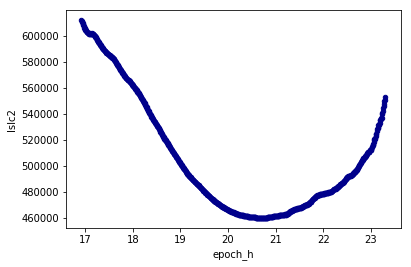

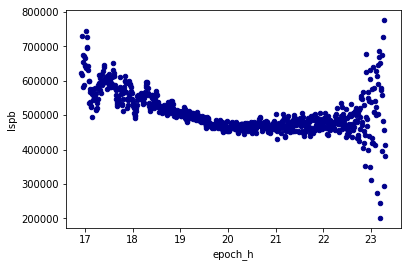

In [19]:

#df['VtecL']=df['Islc2']*np.cos(np.arcsin((6400/(6400+400))* np.sin(80)))   #0.9782
#df['VtecL2']=df['Islc2']**np.sqrt(1-(6400*np.cos(80)/(6400+400)))#

#MF = (np.cos(np.arcsin((6400/(6400+400))* np.sin(80))))**-1
#df['Rfactor']=(40.308*((1575.43**2)-(1227.60**2)))/(c_cons*((1575.43**2)*(1227.60**2))) # kombinaciya chastot
#df['P2-P1']=(df['P2']-dfa['P1'])/c_cons # растоян 2 частот - растоян 1 частот на скорость света 

#df['DCBr']=df['Rfactor']*df['Vtec2']*MF-df['P2-P1']-DCBs
df.plot.scatter(x='epoch_h',y='Islc2',c='DarkBlue')
df.plot.scatter(x='epoch_h',y='Ispb',c='DarkBlue')
#out = ds.loc[:,["epoch_h","svs","Ispb","Vtec",'Vtec2','Islc2']]
#out = df.loc[:,["svs","epoch_h","epoch","Islc2"]]
#out.to_csv('out_.csv', sep=';', encoding='utf-8')            


c:\users\helg\myvirt\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\helg\myvirt\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\helg\myvirt\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'TEC')

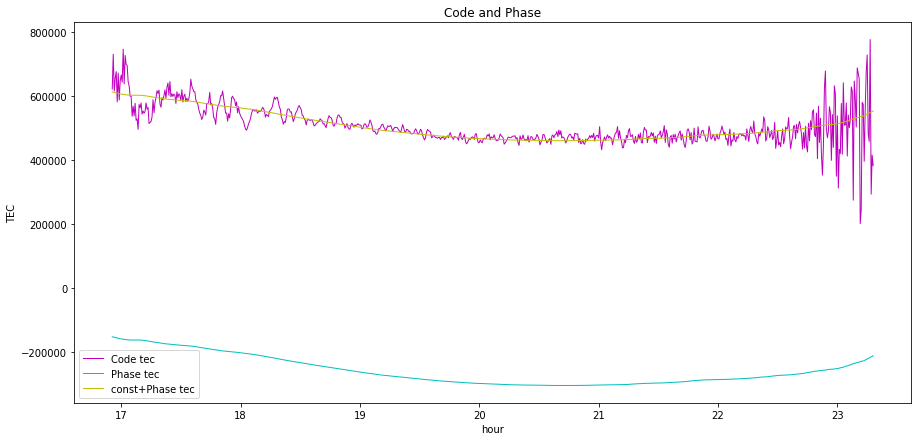

In [20]:

                                                            ####  ---     --- ---    -- -    SITEL  -  -  - - - - -  - - -
#ds = (df.loc[df['svs'] == 'G0'])#18 #10 #7
#ds =  dfa[dfa['svs'].isin(['G4','G6','G7','G17','G10','G30'])]

#out = ds.loc[:,["epoch_h","svs","Ispb","Vtec",'Vtec2','Vtec3']]
#out.to_csv('out_d1.csv', sep=';', encoding='utf-8')                    ############     C S V  ###########
#ds = (df.loc[df['epoch_h'] == ''])
#ds = ds.loc[(ds['epoch_h'] >= 9) & (ds['epoch_h'] < 13)]# c 6 часа по 8 угол 80
#print(ds)

#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']-df['L2'])
#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']*(c_cons/1575.43)-df['L2']*(c_cons/1227.60))
#df.plot.scatter(x='epoch_h',y='Islc2',c='DarkBlue')
#df.plot.scatter(x='epoch_h',y='Islc2',c='DarkBlue')
plt.show()
plt.figure(figsize=(15,7))
plt.plot(df.epoch_h,df.Ispb , 'm', lw=1)
plt.plot(df.epoch_h,df.Islc , 'c', lw=1)
plt.plot(df.epoch_h,df.Islc2 , 'y', lw=1)
#plt.plot(df['VtecL'], 'g', lw=1)
#plt.plot(df['VtecL2'], 'b', lw=1)
plt.title('Code and Phase')
plt.legend(['Code tec', 'Phase tec', 'const+Phase tec'])
plt.xlabel('hour')
plt.ylabel('TEC')
#ds.dropna(inplace=True)
#ds
#df.dtypes

In [21]:
SVS=[]
EPOCH=[]
PARAM=[]
def svs(input_file):# pars SVS file
    #input_file
    #print(len(elefile))
    inp=input_file.replace("   ", " ")
    inp=inp.replace("  ", " ")
    inp = inp.replace(" ", " ")
    inp=inp.strip()
    inp= inp.split(" ")
    mpiq=inp.pop(0) # del 1 elrmrnt skoka sputnikov
    inp = list(map(int, inp))
    return inp
def param(param_file):# pars PARAM file
    par=param_file.replace("    ", " ")
    par=par.replace("   ", " ") 
    par=par.replace("  ", " ")
    par=par.replace(" ", " ")
    par=par.strip()
    par= par.split(" ")
    par = list(map(float, par))# perevod v float
    return par

def get_info(gns_file):
    t = 0
    svsList=list()# arr for svs names
    paramGNS=[] # arr for parame
    timeSvs=[] # arr for time param
    dataGNS=[]# arr svs = param
    dataEpoch=[]# arr svs = epoch
    filename =   os.path.basename(gns_file)
    file = open (filename)
    allLines = file.readlines()
    filelinecount = len(allLines)
    file.seek(0) # peremestit ukozatel v nachal
    for ln in range(filelinecount) :#3700 strok все строки
        line  = file.readline()
        if ln>3 and ln % 2 ==0: #  четные строки         
            #print(len(line))
            if len(line) > 3:##       SVS ION -1 eto 3 simvola
                S = svs(line)  #func
                #print(S)
            svsList.append(S) # дописывает названия пока строка -1
        if (ln % 2) and (ln > 4) != 0: # n четные строки
            if len(line) > 3: #  nezachem
                p = param(line)
                tt = np.full(len(p),t)# massiv vremeni zapolnyaet kol element, znachenie
            paramGNS.append(p)
            timeSvs.append(tt)# dla vremeni 
            t += 30  # vremya uvelich      
    
    sVs = np.array(svsList,dtype=object)
    PGNS = np.array(paramGNS,dtype=object)
    tS = np.array(timeSvs,dtype=object)

    for i in range(len(sVs)):#  SVS epoch columns

        for ii in range(len(sVs[i])):                                                       
            SVS.append(sVs[i][ii])
            EPOCH.append(tS[i][ii])
            PARAM.append(PGNS[i][ii])

    df = pd.DataFrame(SVS, columns=['svs'])
    df.insert(loc=0, column="epoch", value=EPOCH)
    df.insert(loc=0, column="ele", value=PARAM)
    

    return df
#    return df, dt
#Зделать функцию по проверки и удалению лишних таблиц спутников для равенства таблиц

######################################################################

ele = get_info('POLY0501a.ele')
ele = ele.astype({'ele':'float'})
#ele['epoch_h']=ele['epoche'/3600]
G = ele.loc[ele['svs']==32]
#G =  ele[ele['svs'].isin(['G7','G17','G30','G2','G19','G18','G29','G32','G10'])]
G['epoch_h']= G['epoch']/3600
#G = G.loc[(G['epoch_h'] >= 5) & (G['epoch_h'] < 8)]# 28
#G = G.loc[(G['epoch_h'] >= 6.2) & (G['epoch_h'] < 9)]# 17
#G = G.loc[(G['epoch_h'] >= 9.8) & (G['epoch_h'] < 12.6)]# 17
#G = G.loc[(G['epoch_h'] >= 14.5) & (G['epoch_h'] < 17.5)]# 18
G = G.loc[(G['epoch_h'] >= 18.5) & (G['epoch_h'] < 21.5)]# 32
#G = G.loc[(G['epoch_h'] >= 15.9) & (G['epoch_h'] < 18.6)]# 20
#G = G.loc[(G['epoch_h'] >= 8.7) & (G['epoch_h'] < 11.1)]# 6
#G = G.loc[(G['epoch_h'] >= 7.5) & (G['epoch_h'] < 10)]# 19
#G = G.loc[(G['epoch_h'] >= 12.9) & (G['epoch_h'] < 15.5)]# 29
#G = G.loc[(G['epoch_h'] >= 10.3) & (G['epoch_h'] < 12.5)]# 12
#G.dtypes
#f = df.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float'})


c:\users\helg\myvirt\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
#vlook = (pd.merge(df, G.loc[:,{'svs', 'epoch', 'epoch_', 'Ispb', 'Iscl2'}], how='left', left_on=['svs'], right_on=['svs'],copy=False))
#G.head()
fg = df.merge(G, on='epoch', how='left')

#G.loc[G['epoch']==38550]
#G.head(15)
#tt =fg.loc[fg['ele']>70]
#tt

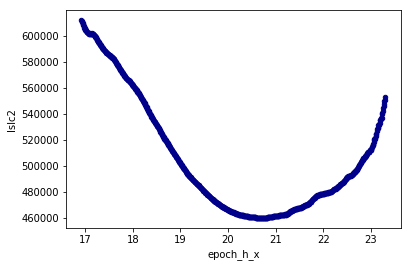

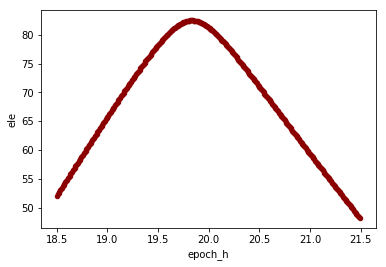

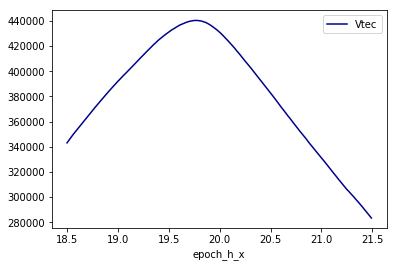

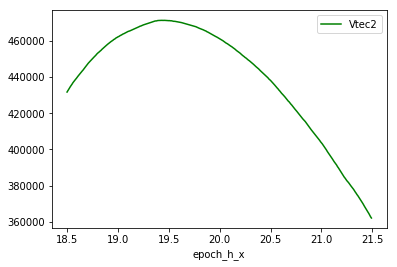

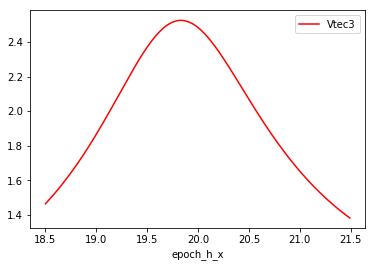

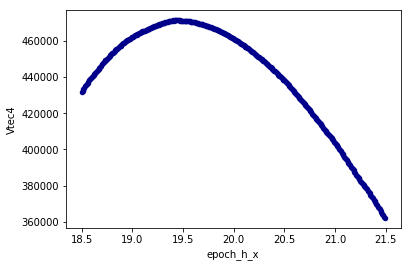

In [23]:
D = fg.loc[:,["svs_x","ele","epoch_h_x","epoch","Islc2","Ispb"]]
#D = D.loc[D['ele']>70]
#D.head(2)
D['Vtec'] =  D['Islc2']* np.sqrt(  1-(  (6400*np.cos(D['ele']*3.14/180))  /  (6400+350)   )     ) #
#D['Vtec'] = D['Ispb']*np.sqrt(  1-(  (6400 *  (np.cos(33)) )  /  (6400+350)   )     ) #
D['Vtec2'] = D['Islc2']*np.sqrt(  1-(  (6400*np.cos(D['ele']*3.14/180))  /  (6400+350)   )**2     ) #

D['Vtec3'] = D['Islc2']*  np.cos(np.arcsin  (  (6400*np.sin(D['ele']*3.14/180))  /  (6400+400)   )     ) #
D['Vtec3'] =   np.cos(np.arcsin  (  6371*np.sin((D['ele']*3.14/180))  /  (6371+506.7)   )     )**-1 #
D['Vtec4'] =  D['Islc2']*  (np.cos  (np.arcsin(  (6400*np.cos(D['ele']*3.14/180))  /  (6400+350) )  )     ) #
D.plot.scatter(x='epoch_h_x',y='Islc2',c='DarkBlue')
G.plot.scatter(x='epoch_h',y='ele',c='DarkRed')
D.plot(x='epoch_h_x',y='Vtec',c='DarkBlue')
D.plot(x='epoch_h_x',y='Vtec2',c='Green')
D.plot(x='epoch_h_x',y='Vtec3',c='Red')
D.plot.scatter(x='epoch_h_x',y='Vtec4',c='DarkBlue')
out = D.loc[:,["svs_x","epoch_h_x","Vtec"]]
out.to_csv('out_.csv', mode='a', header=True, sep=';', encoding='utf-8') 
out.to_csv('out_.csv', header=True, sep=';', encoding='utf-8') 


Text(0, 0.5, 'TEC')

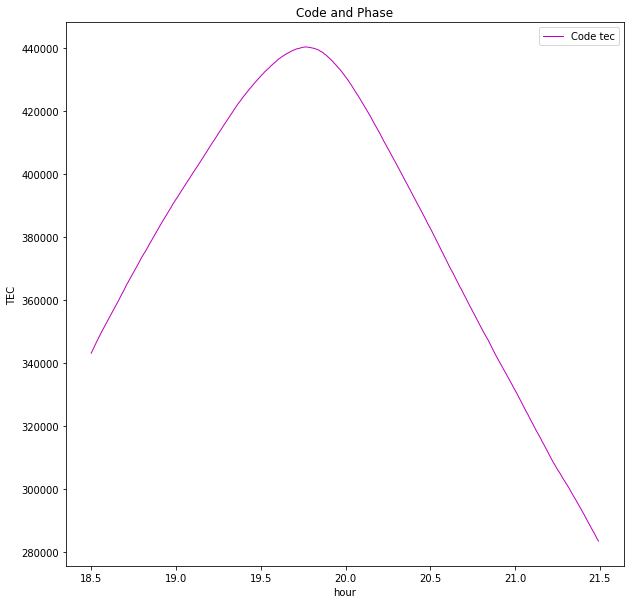

In [24]:
plt.show()
plt.figure(figsize=(10,10))

plt.plot(D.epoch_h_x,D.Vtec , 'm', lw=1)

#plt.plot(df['VtecL'], 'g', lw=1)
#plt.plot(df['VtecL2'], 'b', lw=1)
plt.title('Code and Phase')
plt.legend(['Code tec', 'Phase tec', 'const+Phase tec'])
plt.xlabel('hour')
plt.ylabel('TEC')

In [3040]:
x = 1.57-np.arcsin(0.934*np.cos(50))
x


0.44728899441051206